In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [40]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

One year from the latest date is:  2016-08-23


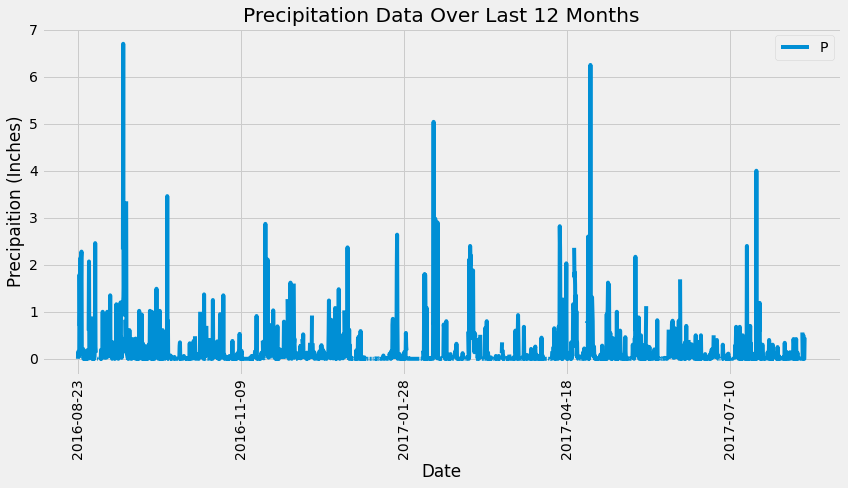

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_earlier_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One year from the latest date is: ", year_later_date)
# Perform a query to retrieve the data and precipitation scores
date_precip = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= year_earlier_date).\
                order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(date_precip).set_index("date")
df
# Sort the dataframe by date
df = df.sort_values("date")
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.line(figsize=(12,7))
plt.xticks(rotation=90)
plt.title("Precipitation Data Over Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipaition (Inches)")
plt.legend("Precipitaion")
plt.tight_layout()
plt.show()

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [66]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(func.count(Station.station)).all()
num_stations

[(9)]

In [78]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [89]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stid = session.query(Measurement.station).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).first()
most_active_stid
#calculate lowest, highest, avg temp
temp = [func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]

temp_data = session.query(*temp).\
                filter(Measurement.station == 'USC00519281').all()
temp_data

[(54.0, 85.0, 71.66378066378067)]

In [85]:
most_active_stid

('USC00519281')

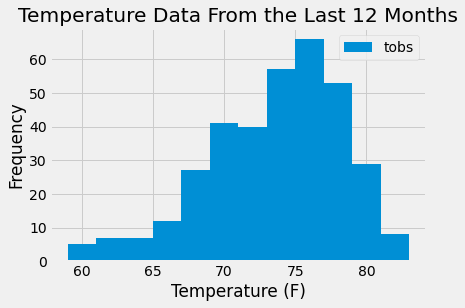

In [96]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_data = session.query(Measurement.tobs).\
                filter(Measurement.station=='USC00519281').\
                filter(Measurement.date >= year_earlier_date).\
                order_by(Measurement.tobs.desc()).all()
year_data
#put into database to graph
year_df = pd.DataFrame(year_data)
year_df

#Create Histogram
plt.hist(year_df['tobs'], bins=12)
plt.title("Temperature Data From the Last 12 Months")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.legend(['tobs'])
plt.show()

# Close session

In [97]:
# Close Session
session.close()